In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
yf.pdr_override()

In [5]:
symbol = 'AMD'
start = dt.date.today() - dt.timedelta(days = 365*5)
end = dt.date.today()
df = yf.download(symbol,start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-28,12.53,12.55,12.16,12.23,12.23,35969600
2017-08-29,12.00,12.18,11.93,12.15,12.15,33618100
2017-08-30,12.19,12.68,12.16,12.67,12.67,43933000
2017-08-31,12.82,13.16,12.79,13.00,13.00,51822100
2017-09-01,13.12,13.49,13.04,13.19,13.19,53158600


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-18,97.739998,101.070000,96.730003,100.440002,100.440002,76059500
2022-08-19,98.669998,99.250000,94.589996,95.949997,95.949997,67167500
2022-08-22,94.400002,95.019997,92.360001,92.839996,92.839996,61837300
2022-08-23,92.389999,94.440002,92.110001,92.489998,92.489998,52927000
2022-08-24,92.209999,93.379997,90.900002,92.730003,92.730003,56453100


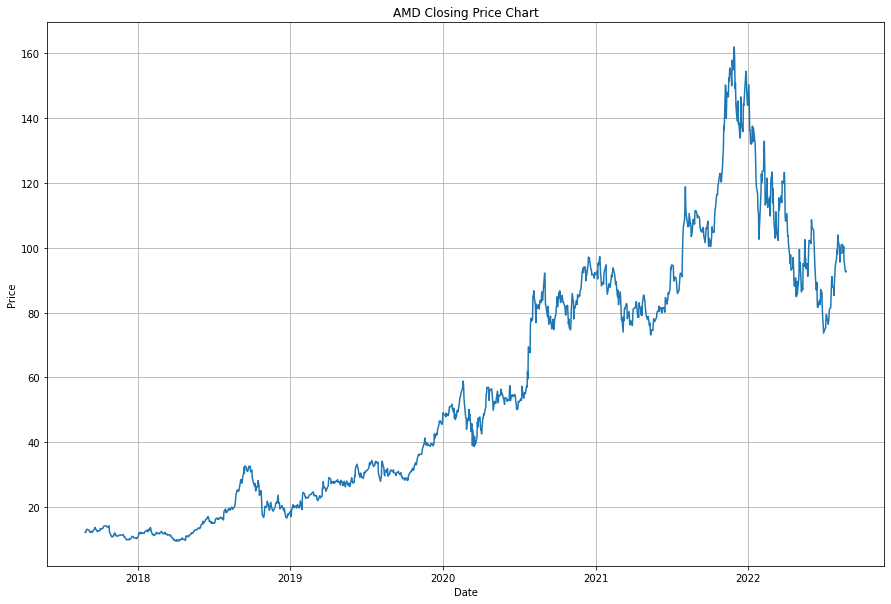

In [7]:
plt.figure(figsize=(15,10))
plt.plot(df['Adj Close'])
plt.title(symbol + ' Closing Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [8]:
monthly = df.asfreq('BM')
monthly['Returns'] = df['Adj Close'].pct_change().dropna()
monthly['Month_Name'] = monthly.index.strftime("%b")
monthly['Month_Name_Year'] = monthly.index.strftime("%b-%Y")
monthly = monthly.reset_index()
monthly['Month'] = monthly["Date"].dt.month

In [9]:
monthly

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Month_Name,Month_Name_Year,Month
0,2017-08-31,12.820000,13.160000,12.790000,13.000000,13.000000,51822100.0,0.026046,Aug,Aug-2017,8
1,2017-09-29,12.770000,12.820000,12.600000,12.750000,12.750000,33926900.0,0.000785,Sep,Sep-2017,9
2,2017-10-31,10.760000,11.310000,10.690000,10.990000,10.990000,78600000.0,0.009183,Oct,Oct-2017,10
3,2017-11-30,10.870000,11.030000,10.760000,10.890000,10.890000,43205000.0,0.005540,Nov,Nov-2017,11
4,2017-12-29,10.570000,10.580000,10.270000,10.280000,10.280000,26678900.0,-0.025592,Dec,Dec-2017,12
5,2018-01-31,13.240000,13.850000,13.150000,13.740000,13.740000,140977800.0,0.067599,Jan,Jan-2018,1
6,2018-02-28,12.660000,12.730000,12.100000,12.110000,12.110000,43387500.0,-0.033520,Feb,Feb-2018,2
7,2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar,Mar-2018,3
8,2018-04-30,11.060000,11.140000,10.870000,10.880000,10.880000,50608800.0,-0.020702,Apr,Apr-2018,4
9,2018-05-31,13.740000,13.930000,13.690000,13.730000,13.730000,46797700.0,-0.006512,May,May-2018,5


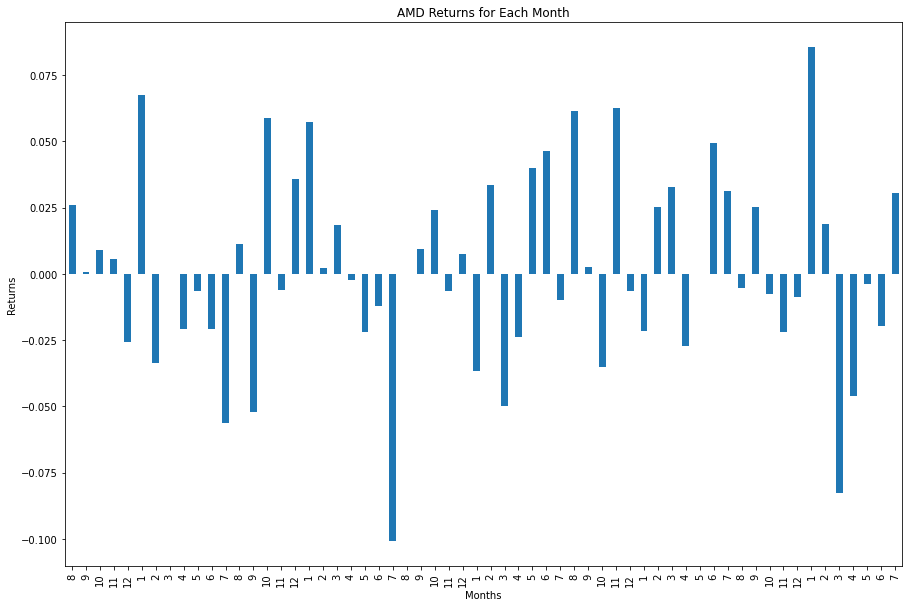

In [10]:
monthly['Returns'].plot(kind='bar', figsize=(15,10))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title(symbol + " Returns for Each Month")
plt.xticks(monthly.index, monthly['Month'])
plt.show()

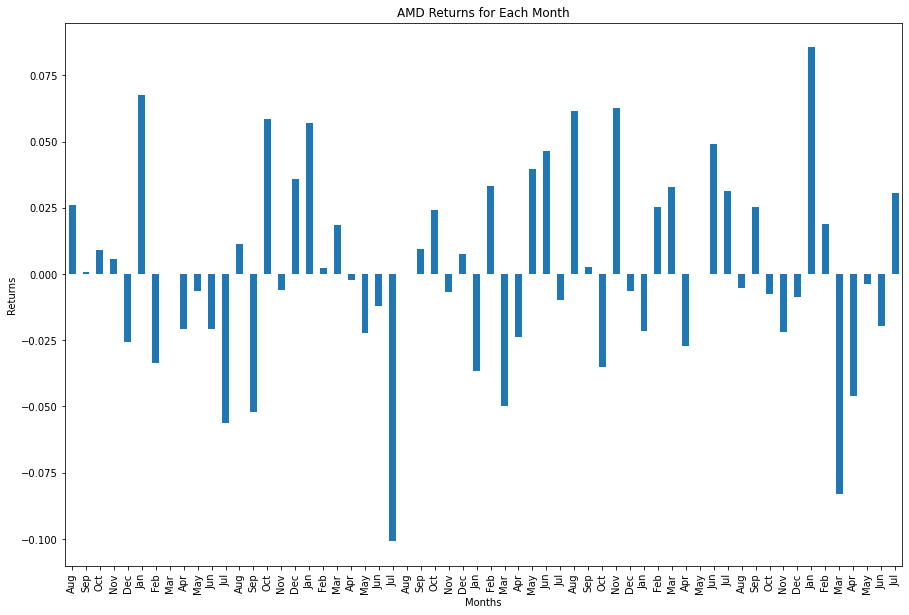

In [11]:
monthly['Returns'].plot(kind='bar', figsize=(15,10))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title(symbol + " Returns for Each Month")
plt.xticks(monthly.index, monthly['Month_Name'])
plt.show()

In [12]:
monthly['ReturnsPositive'] = 0 < monthly['Returns']
monthly['Date'] = pd.to_datetime(monthly['Date'])
monthly['Date'] = monthly['Date'].apply(mdates.date2num)

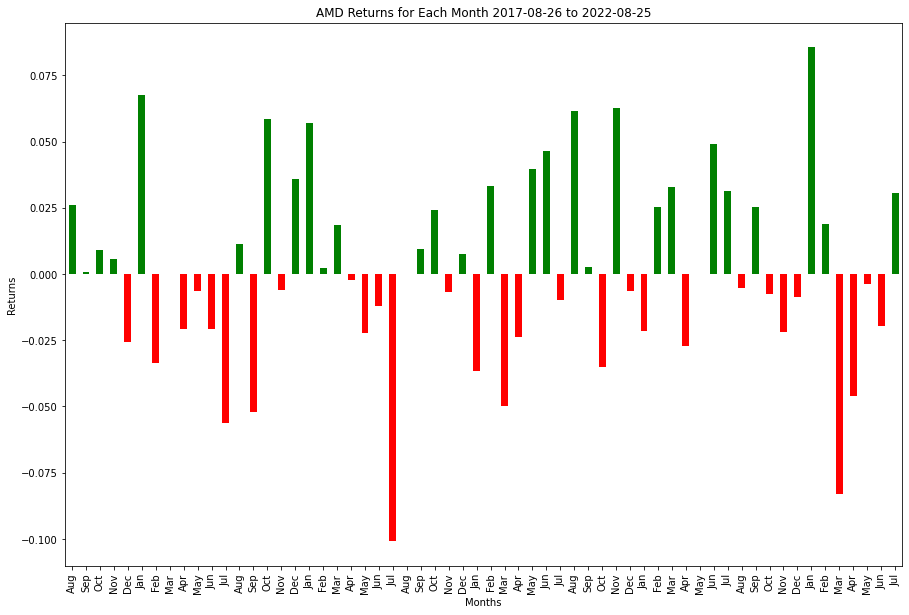

In [14]:
colors = monthly.ReturnsPositive.map({True: 'g', False: 'r'})
monthly['Returns'].plot(kind='bar', color = colors, figsize=(15,10))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title(symbol + " Returns for Each Month " + str(start) + ' to ' + str(end))
plt.xticks(monthly.index, monthly['Month_Name'])
plt.show()

In [15]:
yearly = df.asfreq('BY')
yearly['Returns'] = df['Adj Close'].pct_change().dropna()
yearly = yearly.reset_index()
yearly['Years'] = yearly['Date'].dt.year
print(yearly)

        Date        Open        High         Low       Close   Adj Close  \
0 2017-12-29   10.570000   10.580000   10.270000   10.280000   10.280000   
1 2018-12-31   18.150000   18.510000   17.850000   18.459999   18.459999   
2 2019-12-31   45.070000   46.090000   44.919998   45.860001   45.860001   
3 2020-12-31   92.099998   92.300003   90.870003   91.709999   91.709999   
4 2021-12-31  146.160004  148.610001  143.550003  143.899994  143.899994   

     Volume   Returns  Years  
0  26678900 -0.025592   2017  
1  84732200  0.035915   2018  
2  31673200  0.007469   2019  
3  24930700 -0.006285   2020  
4  49448100 -0.008612   2021  


In [16]:
yearly['ReturnsPositive'] = 0 < yearly['Returns']
yearly['Date'] = pd.to_datetime(yearly['Date'])
yearly['Date'] = yearly['Date'].apply(mdates.date2num)

<Figure size 432x288 with 0 Axes>

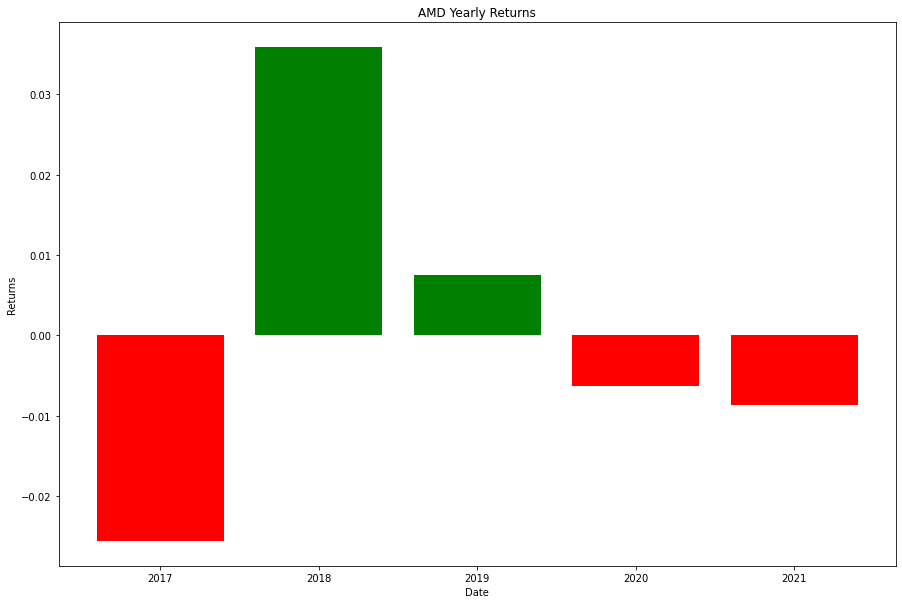

In [17]:
colors = yearly.ReturnsPositive.map({True: 'g', False: 'r'})
plt.gcf()
plt.gcf()
plt.figure(figsize=(15,10))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.title(symbol + ' Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

In [18]:
df['Returns'] = df['Adj Close'].pct_change().dropna()
yearly_returns_avg = df['Returns'].groupby([df.index.year]).mean()
print(yearly_returns_avg)

Date
2017   -0.001596
2018    0.003122
2019    0.004174
2020    0.003476
2021    0.002145
2022   -0.001937
Name: Returns, dtype: float64
